In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [9]:
df = pd.read_csv('data/r_cross_val.csv')
df.date = pd.to_datetime(df.date)
df

,date,close,forecast
0,2020-05-21,183.429993,185.751586
1,2020-05-22,183.509995,183.617777
2,2020-05-26,181.570007,183.701864
3,2020-05-27,181.809998,181.831493
4,2020-05-28,181.399994,182.058582
...,...,...,...
248,2021-05-17,245.179993,248.482677
249,2021-05-18,243.080002,245.620979
250,2021-05-19,243.119995,243.580506
251,2021-05-20,246.479996,243.591892


# Plotting

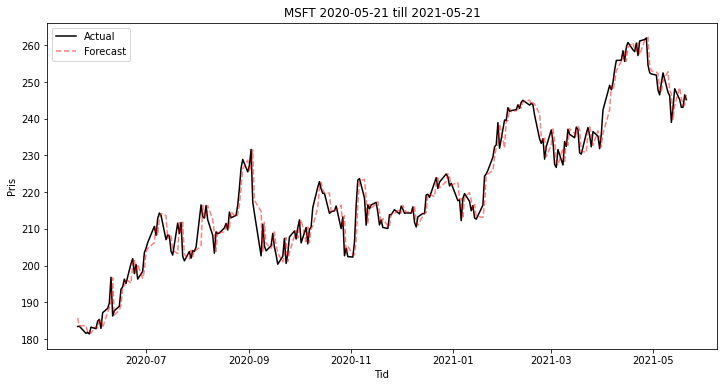

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'], label="Actual", color="black")
plt.plot(df['date'], df['forecast'], label="Forecast", color="red", alpha=0.5, linestyle="--")
plt.xlabel('Tid')
plt.ylabel('Pris')
plt.title('MSFT 2020-05-21 till 2021-05-21') 
plt.legend()

# Trading

In [56]:
# Make it more complex, with a bank (e.g. $1000) that can be used instead of only one unit

periods = 253
last_training = 185.66

bank_start = 3000
bank = bank_start

risk_max = 0.25
stock_count = 0
nr_buys = 0
nr_sells = 0
last_close = df['close'].iloc[-1]

for row, values in df.iterrows():
    latest_close = last_training if row < 1 else df['close'].iloc[row-1]
    forecast = df['forecast'].iloc[row]
    expected = forecast - latest_close

    portfolio = stock_count*latest_close
    total_value = portfolio + bank

    max_to_trade = math.floor(total_value * risk_max / latest_close)
    nr_to_buy = max_to_trade if max_to_trade * latest_close < bank else math.floor(bank / latest_close)
    nr_to_sell = max_to_trade if max_to_trade < stock_count else stock_count
        
    if expected > 0:
        bank -= latest_close * nr_to_buy
        stock_count += nr_to_buy
        nr_buys += nr_to_buy
    
    if expected < 0:
        bank += latest_close * nr_to_sell
        stock_count -= nr_to_sell
        nr_sells += nr_to_sell
        
    if row == periods-1 and stock_count > 0: # if last period and holding stocks, sell
        bank += latest_close * stock_count
        nr_sells += stock_count

buy_hold = last_close - last_training
trading = bank - bank_start

print(f'trading: nr buys: {nr_buys}, nr sells: {nr_sells}, yield: {round(bank/bank_start*100 - 100, 2)}%')
print(f'buy&hold: buy at {last_training}, sell at {last_close}), yield: {round((last_close-last_training)/last_training*100, 2)}%')
    
    

3000.0
2991.079972
2991.7199880000003
2968.440132
2972.2799880000002
2965.719924
2995.32002
2988.6000520000002
3021.880084
3029.0800360000003
2990.039988
3058.519972
3077.0800360000003
3100.120068
3212.7599560000003
3085.9200520000004
3109.4400680000003
3128.6400200000003
3202.7201000000005
3213.4400680000003
3246.7201000000005
3232.6799440000004
3319.400152
3335.480116
3302.9200520000004
3332.9200520000004
3268.7601480000003
3302.520148
3383.6400360000002
3397.9200600000004
3410.400044
3428.160052
3428.160052
3446.4800600000003
3446.4800600000003
3446.4800600000003
3446.4800600000003
3451.600056
3449.119952
3399.6800120000003
3383.040124
3522.5601400000005
3476.9600440000004
3524.9600440000004
3377.599932
3357.7600920000004
3398.5601400000005
3369.280108
3401.9200120000005
3399.3599480000003
3417.1199640000004
3601.599932
3562.5999320000005
3557.0000760000003
3611.5601400000005
3565.1200200000003
3497.4400840000003
3419.5201640000005
3512.480116
3504.6400360000002
3507.839988
3529.920